Things to do


Prep
- Import Packages
- Import Data
- Visualise Data
- Clean Data

Exploration
- Subsetting Data
- Interaction Terms and Other
- Testing Methods

Creating Final Model
- What to include?
- Generating Pipeline

Final
- Training Full Pipeline
- Generating Predictions

# Initial Preparation

## Import Packages

In [1]:
#import sys
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
#pip install pandas_profiling

In [3]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [4]:
df = pd.read_csv("twitter_training.csv", names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

## Visualise Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Clean Data

<BarContainer object of 4 artists>

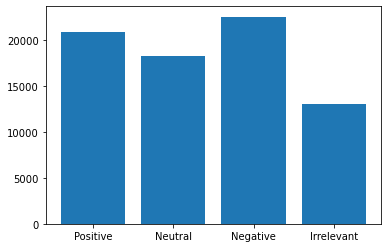

In [7]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [8]:
df = df.dropna()

# Exploration

In [9]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [10]:
print(df["Entity"].unique())

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 4 artists>

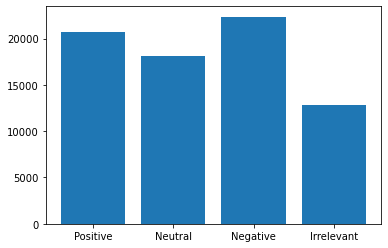

In [11]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [12]:
#Adding dimensions with textblob
tb_polarity = []
tb_subject = []


for tweet in df["Tweet_Content"]:
    tb_polarity.append(TextBlob(tweet).sentiment[0])
    tb_subject.append(TextBlob(tweet).sentiment[1])
    
    
df["Polarity"] = tb_polarity
df["Subjectivity"] = tb_subject

In [13]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Polarity,Subjectivity
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0


(array([16754.,  1713.,  5417.,  4919.,  8606., 12481.,  8250.,  4591.,
         3772.,  7493.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

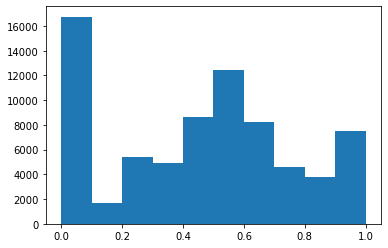

In [14]:
plt.hist(df["Subjectivity"])

## Subsetting Data

In [15]:
y = df["Sentiment"]

df = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content"], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

## Interaction Terms and Other Substantiation of Data

## Testing Methods

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(2, 4), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(2, 4), random_state=1, solver='sgd')

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="macro")

0.40506736861039544

In [20]:
pd.Series(list(y_pred)).unique()

array(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.45216216216216215

#### SVM Classifier

In [22]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train, y_train)

SVC()

In [23]:
y_pred = clf.predict(X_test)

In [24]:
f1_score(y_test, y_pred, average="macro")

0.43996956604377935

In [25]:
accuracy_score(y_test, y_pred)

0.4672972972972973

In [26]:
pd.Series(list(y_pred)).unique()

array(['Negative', 'Irrelevant', 'Positive', 'Neutral'], dtype=object)

In [27]:
#Linear SVC

lin_clf = svm.LinearSVC()

lin_clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average="macro")

0.43996956604377935

In [28]:
accuracy_score(y_test, y_pred)

0.4672972972972973

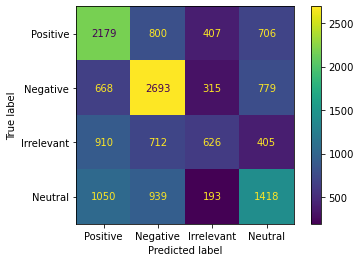

In [29]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_unique = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels = y_unique)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

# Creating Final Model

## What to Include?

## Generating Pipeline

# Final

## Training With Full Dataset

## Generating Predictions